In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [2]:
class RNN(nn.Module):
    def __init__(self, num_inputs, num_hiddens):
        #num_inputs: 输入特征的维度
        #num_hiddens: 隐藏层特征的维度
        super().__init__()
        self.num_inputs= num_inputs
        self.num_hiddens = num_hiddens
        self.rnn = nn.RNN(num_inputs, num_hiddens)

    def forward(self, inputs, H=None):
        #输入是一个形状为(num_steps, batch_size, num_inputs)的张量
        #返回一个形状为(num_steps, batch_size, num_hiddens)的张量
        return self.rnn(inputs, H)
class RNNLM(d2l.RNNLMScratch):  
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)
    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)
    #返回一个形状为(batch_size, num_steps, vocab_size)的张量

In [3]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
model.predict('it has', 20, data.vocab)

查看文件在./data\timemachine.txt


'it hasszzpuqrzpuszzuqqzpus'

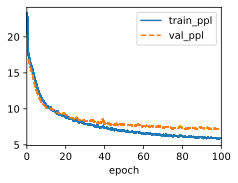

In [4]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)